In [1]:
#importing matplotlib for plotting
import matplotlib.pyplot as plt

#importing random_noise from skimage to add noise to image
from skimage.util import random_noise

#importing numpy to work math operations and array
import numpy as np

#importing skimage.io and PIL.image to open a image
from skimage import io
#PIL is used to open all types of image even in a compressed format
#since we need to open a compressed format image we use this
#but why we import skimage io is , it does not support a compressed
#fomat image but it will give images in array format where as PIL 
# gives us a image object 
from PIL import Image 

#importing scipy.sparse to manipulate sparsity in a matrix 
from scipy import sparse
from scipy.sparse.linalg import spsolve

#importing metrics to calculate psnr value
from skimage import metrics


In [2]:
def sparse_diags(Dia,M):
    dia = Dia #{0:1 , 1:2 , 2:3}
    
    #creating a zeros matrix (size = input image size)
    DM = np.zeros([M,M])
    
    
    #this for loop is used to traverse the rows of
    #zeros matrix to append the values in the 
    #appropriate position 
    for i in range(M):
        
        #this forloop is used to get the
        #position and then to add the values 
        #in that particular position 
        for j in dia:
            
            #this if statement is used to 
            #avoid the index bound error
            #if the position give goes beyond 
            #position of matrix with respect to
            #the main diagonal position
            if i+j >= 0 and i+j < M:
                DM[i][i+j] = dia[j]
    return sparse.coo_matrix(DM)

Denoising image

In [7]:
#loading our image
img = io.imread('cameraman.tif')

#adding gaussian noise to the image
noise_img = random_noise(img, mode='gaussian')

lamda = 0.9


M = noise_img.shape[0]

#giving diagonal position and values accordingly
#here 
#position 0 = main diagonal
#position in negative = distance away from main diagonal - leftwards
#position in positive = distance away from main diagonal - rightwards

Dia = {0:1 , 1:-2 , 2:1}# key [diag pos] and values [diag pos values]
    
#calculating the D-matrix
D = sparse_diags(Dia,M)

# '@' operator is used for matrix multiplication    
F = sparse.eye(M) + lamda* (D.T@D) 

x = spsolve(F, noise_img)

denoised_image = ((spsolve(F, x.T)).T)*256


PSNR

In [8]:
psnr_denoised = round(metrics.peak_signal_noise_ratio(img,denoised_image.astype(np.uint8)),1)
psnr_noised = round(metrics.peak_signal_noise_ratio(img,noise_img.astype(np.uint8)),1)

Plot

Text(0.5, 1.0, 'Denoised image (PSNR =24.1)')

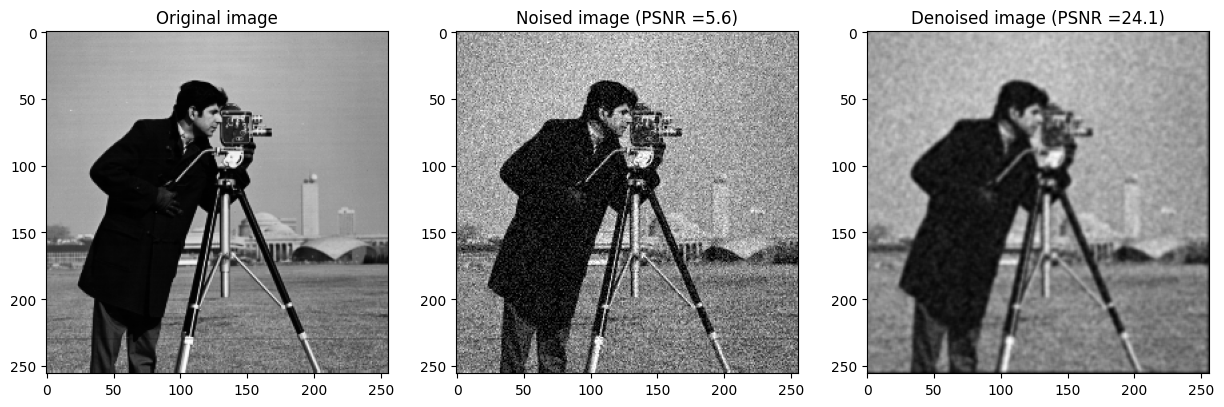

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(noise_img, cmap='gray')
ax[1].set_title(f'Noised image (PSNR ={psnr_noised})')


ax[2].imshow(denoised_image, cmap='gray')
ax[2].set_title(f'Denoised image (PSNR ={psnr_denoised})')

# 3q

(-0.5, 199.5, 199.5, -0.5)

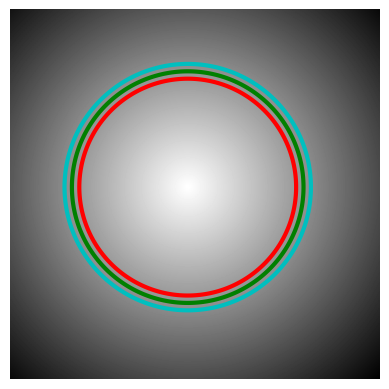

In [10]:
import numpy as np
import matplotlib.pyplot as plt

n = 200 # setting n 200

Y, X = np.meshgrid(range(1, n+1), range(1, n+1)) # generating  X and Y of n by n dimensions 

r = n/3 # setting r as n/3

c = [r + 30, r + 30] # list which contains x and y co-ordinates of the center of circular motion

ucirc = r - np.sqrt((X - c[0])**2 + (Y - c[1])**2) # calculating the distances using Euclidean distance

plt.imshow(ucirc, cmap='gray') #ploting grayscale image

# the center of the circular contour are plotted on top of the 
#image using the contour function, with different colors and line widths for each contour.

plt.contour(ucirc, [4], colors='g', linewidths=3) 
plt.contour(ucirc, [8], colors='r', linewidths=3)
plt.contour(ucirc, [0], colors='c', linewidths=3)
plt.axis('off') # truned off

(-0.5, 199.5, 199.5, -0.5)

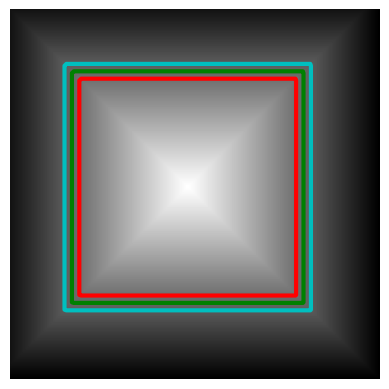

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n = 200 # setting n 200

Y, X = np.meshgrid(range(1, n+1), range(1, n+1)) # generating  X and Y of n by n dimensions 


r = n/3  # setting r as n/3

c = [r + 30, r + 30] # list which contains x and y co-ordinates of the center of circular motion

#calculated as the maximum of the absolute differences between the
# x- and y-coordinates of the pixel and the x- and y-coordinates of the center of the square contour.

usq = r - np.maximum(np.abs(X - c[0]), np.abs(Y - c[1]))

plt.imshow(usq, cmap='gray') #ploting grayscale image

# the center of the circular contour are plotted on top of the 
#image using the contour function, with different colors and line widths for each contour
plt.contour(usq, [4], colors='g', linewidths=3)
plt.contour(usq, [8], colors='r', linewidths=3)
plt.contour(usq, [0], colors='c', linewidths=3)

plt.axis('off')


binarydst
using distance transform edt

(-0.5, 157.5, 149.5, -0.5)

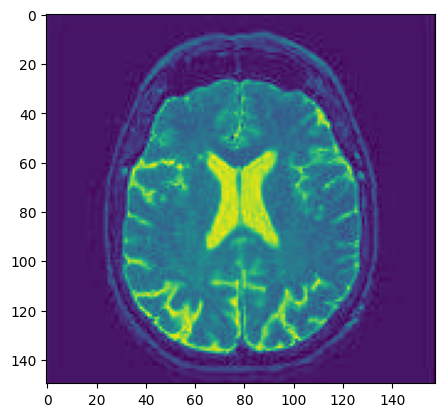

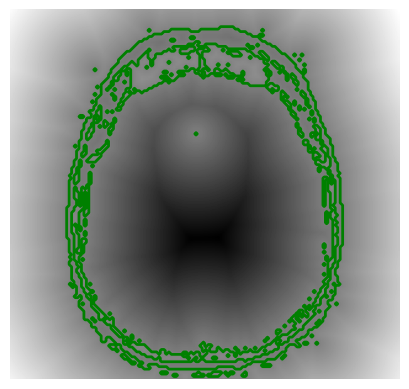

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
from skimage.io import imread
from skimage.color import rgb2gray

x = imread('cortex.jpg') # input image
x = rgb2gray(x)#converting rgb to gray
plt.imshow(x)#ploting using imshow

xb = x > (np.max(x) / 10) # pixel with value greater then threshold set to 1 or else it is set to 0
xb =xb.astype(int)

u1 = (1 - xb) * distance_transform_edt(1-xb) # computing the Euclidean distance transform.
u2 = (xb * distance_transform_edt( xb)) # u2 is distance transform of xb

u = u1 - u2 # finding u with the help u1 and u2

plt.figure()
plt.imshow(u, cmap='gray')

plt.contour(u, [0], colors='g', linewidths=2)
plt.axis('off')


using scipy morphology distance

/tmp/ipykernel_1985/3189896257.py:7: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  u1 = (1 - xb) * scipy.ndimage.morphology.distance_transform_edt(1-xb)


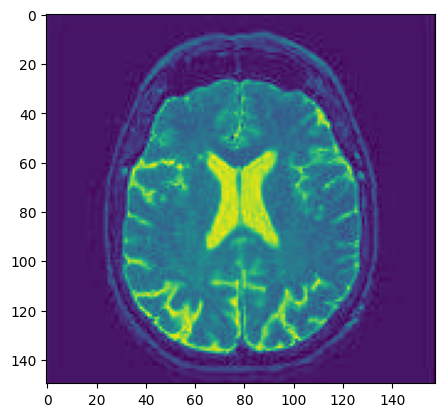

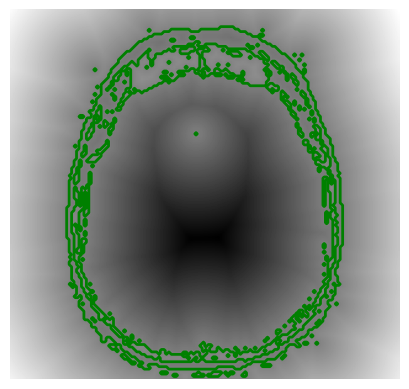

In [13]:
import scipy
x = imread('cortex.jpg')
x = rgb2gray(x)
plt.imshow(x)
xb = x > (np.max(x) / 10)
xb = xb.astype(int) 
u1 = (1 - xb) * scipy.ndimage.morphology.distance_transform_edt(1-xb)
u2 = xb * distance_transform_edt(xb)
u = u1 - u2

plt.figure()
plt.imshow(u, cmap='gray')
#plt.hold(True)
plt.contour(u, [0], colors='g', linewidths=2)
plt.axis('off')
plt.show()

Activeconst

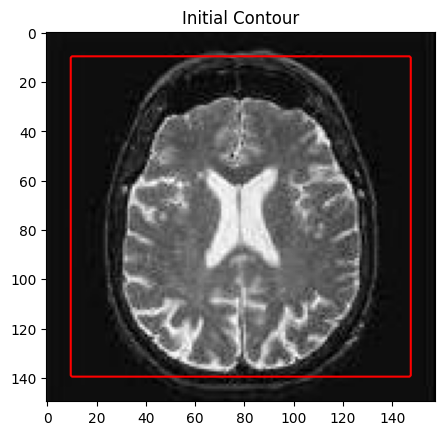

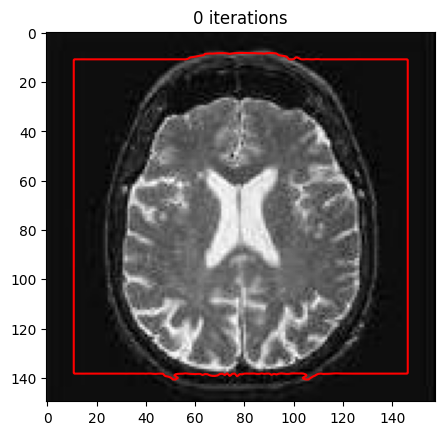

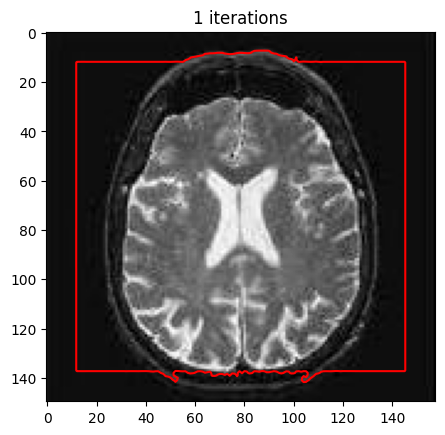

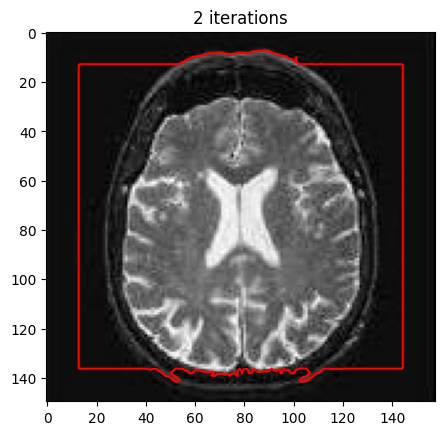

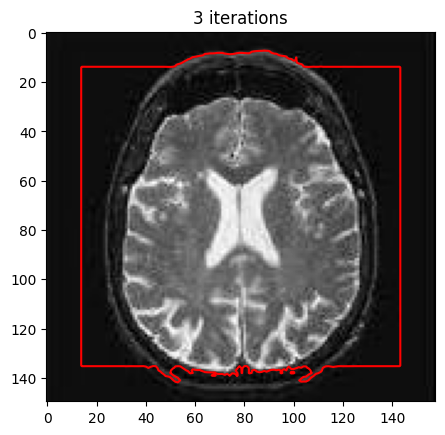

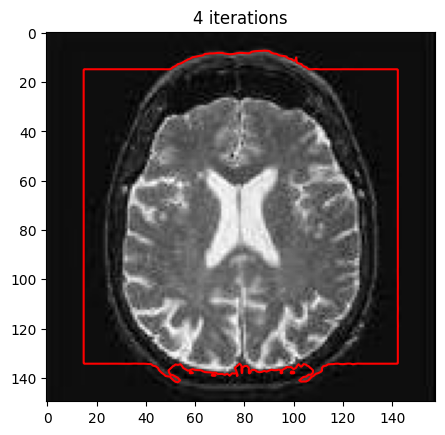

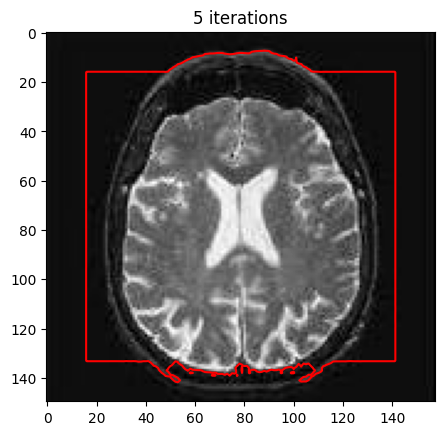

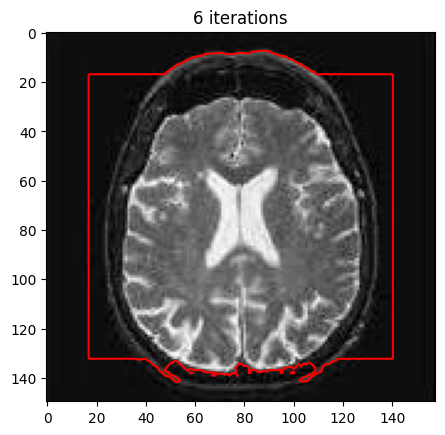

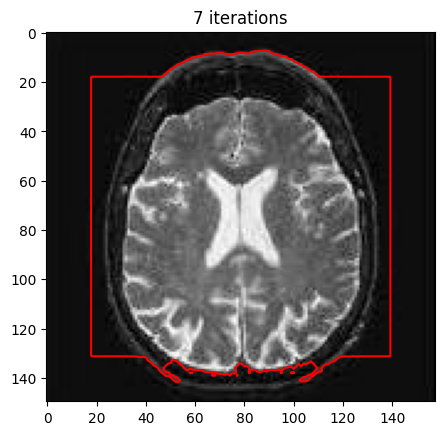

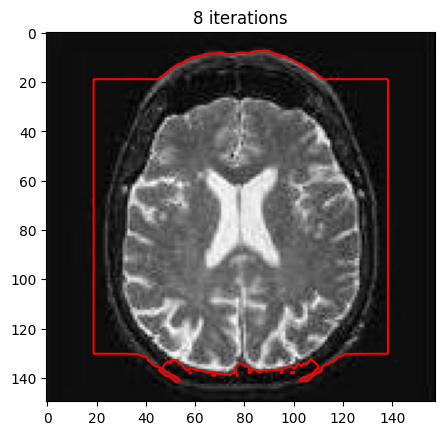

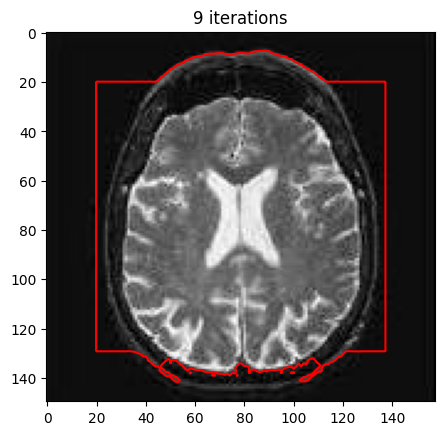

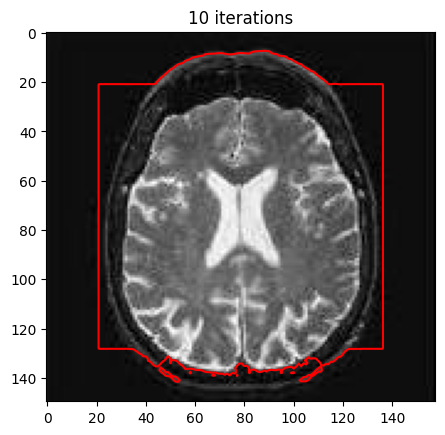

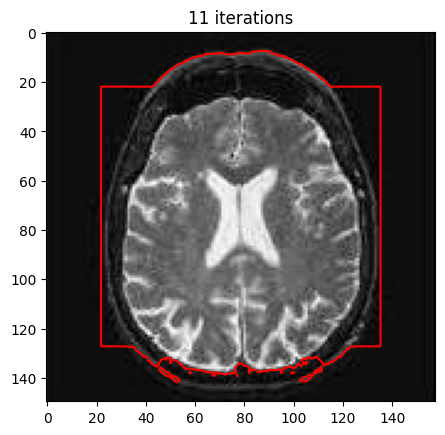

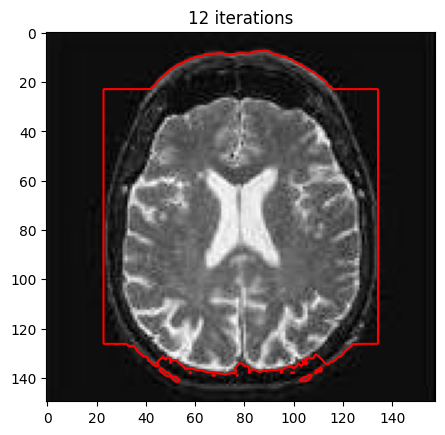

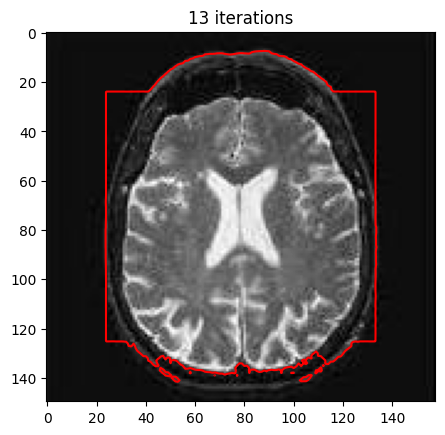

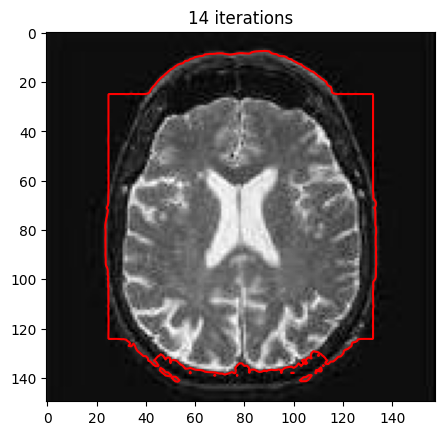

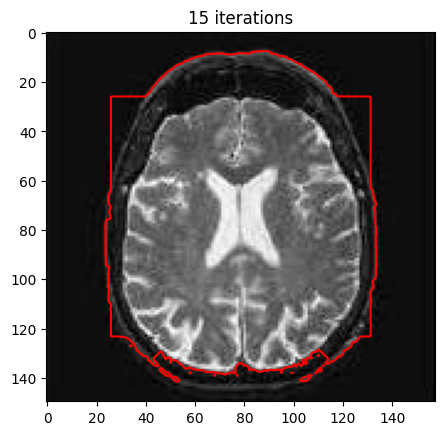

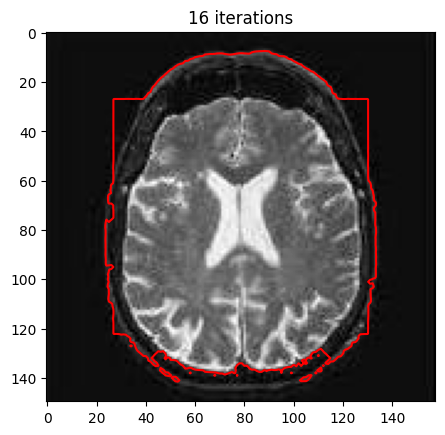

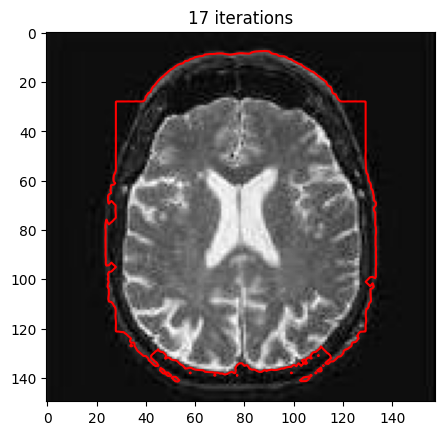

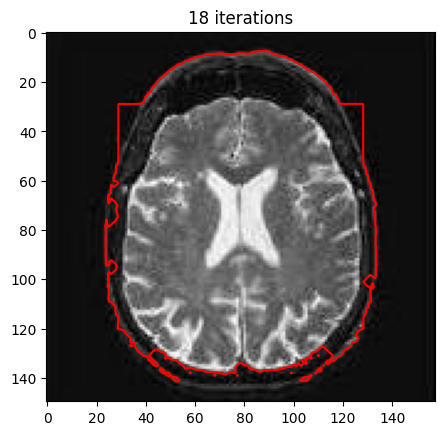

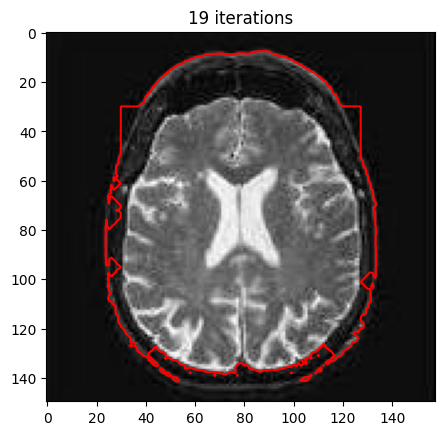

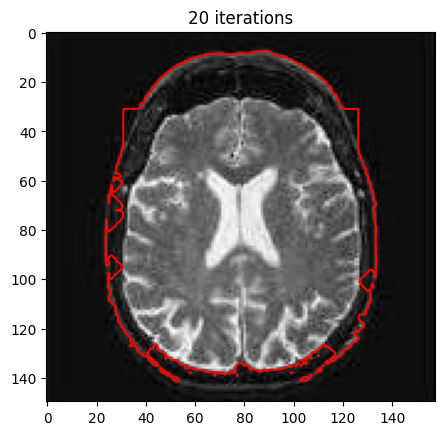

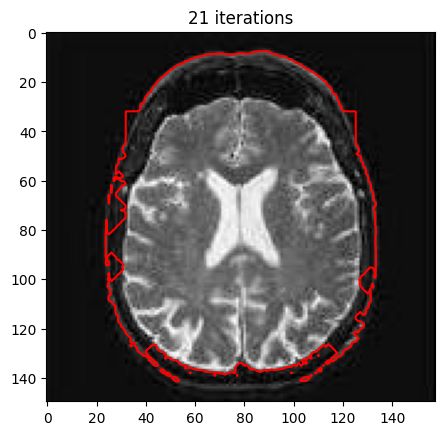

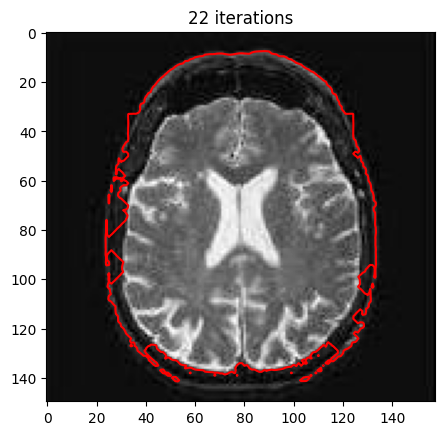

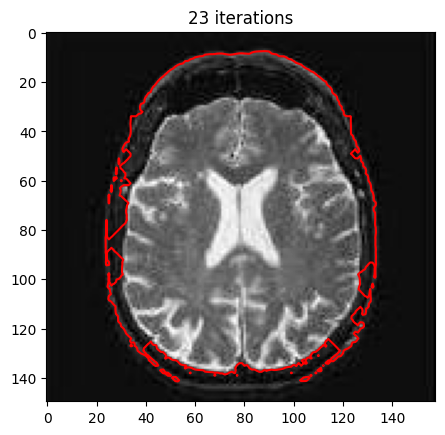

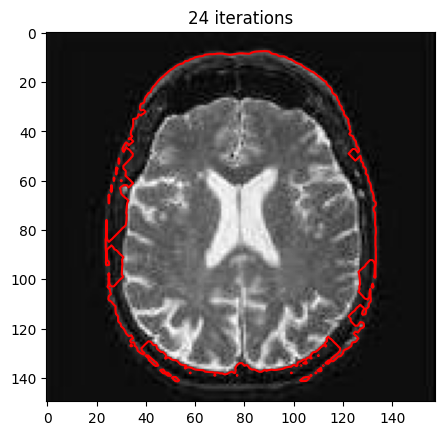

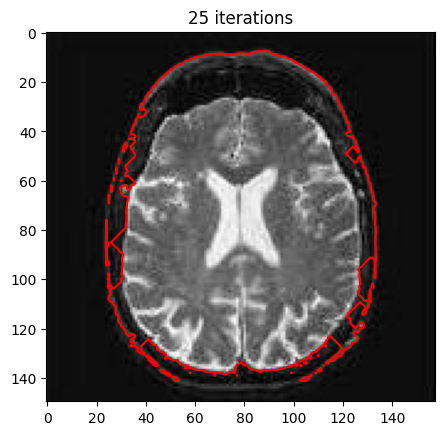

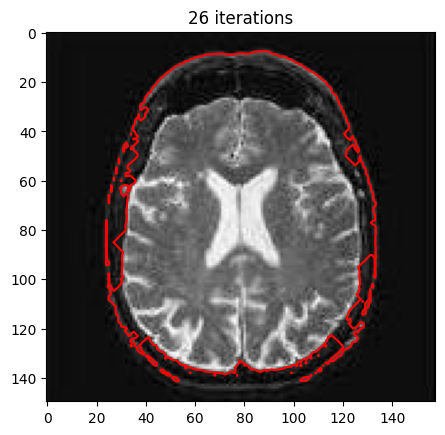

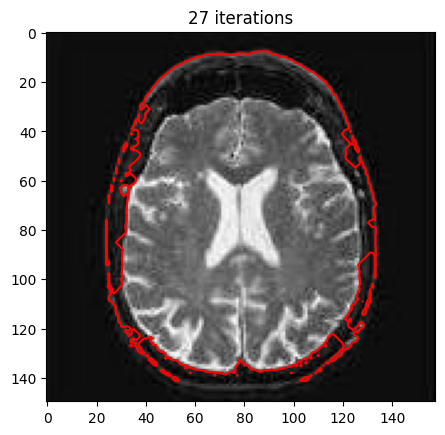

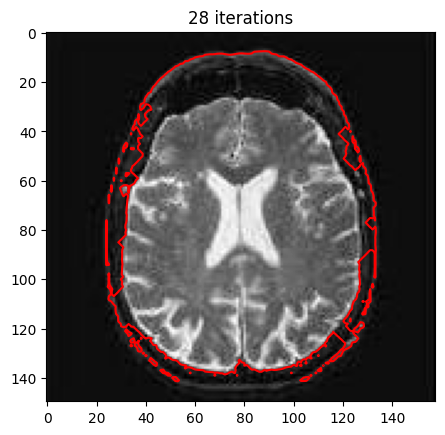

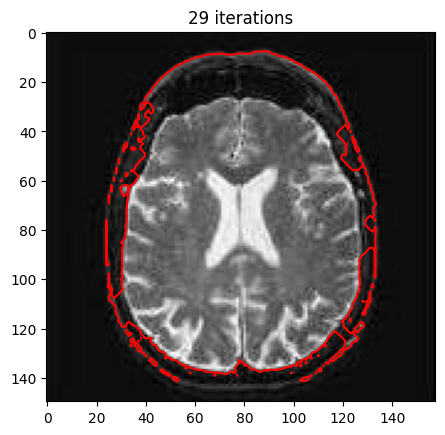

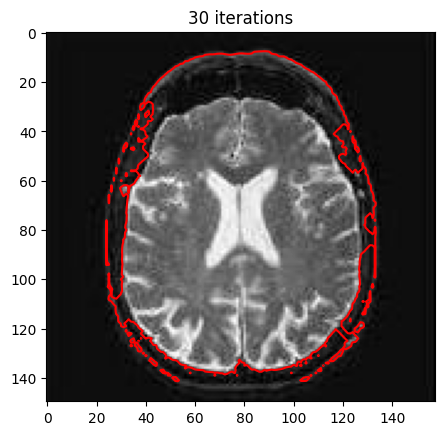

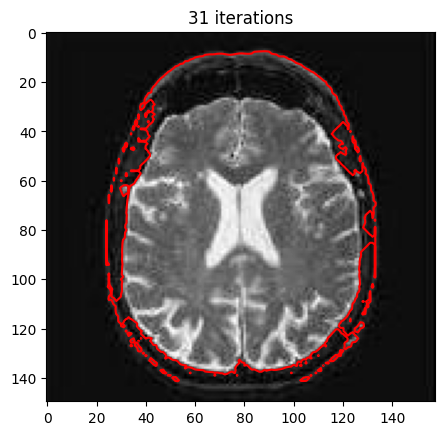

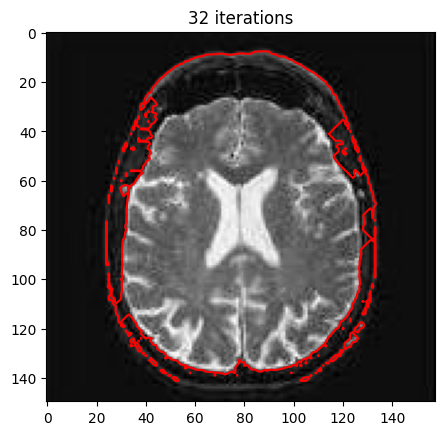

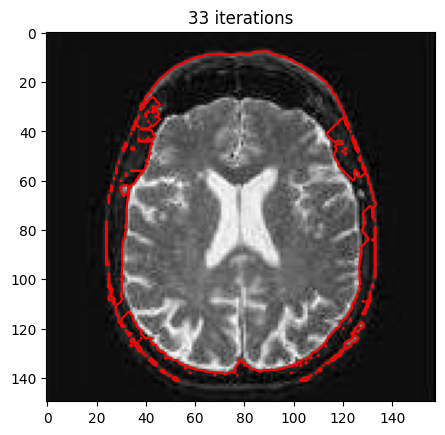

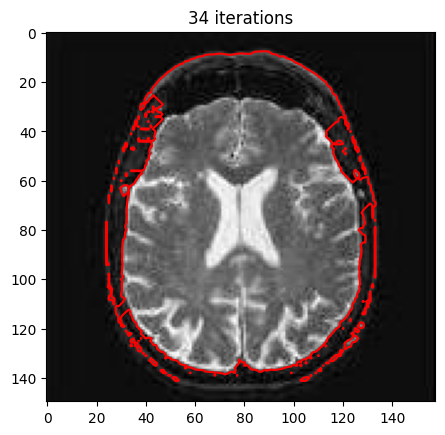

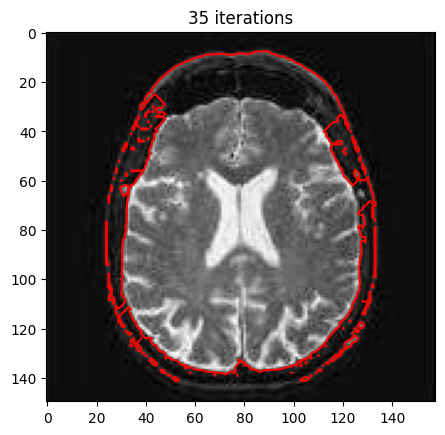

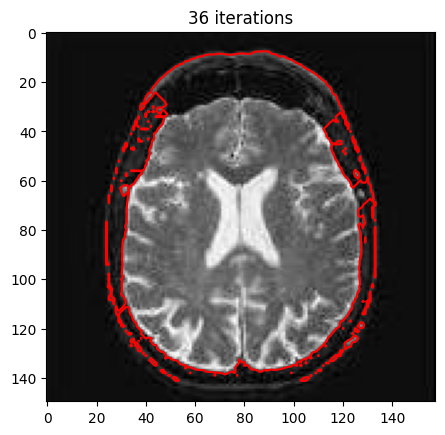

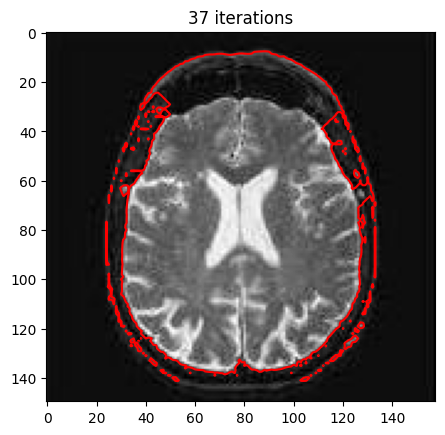

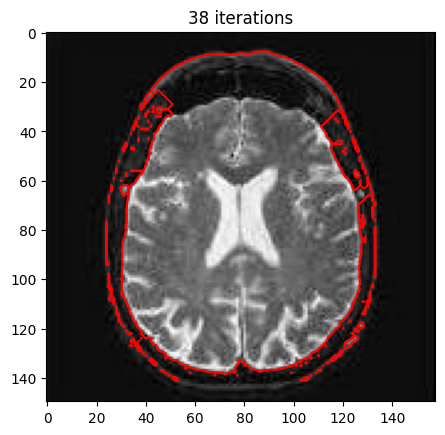

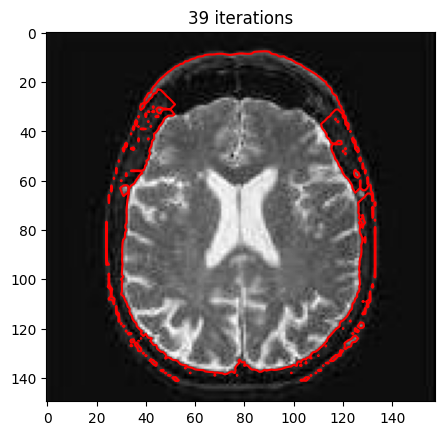

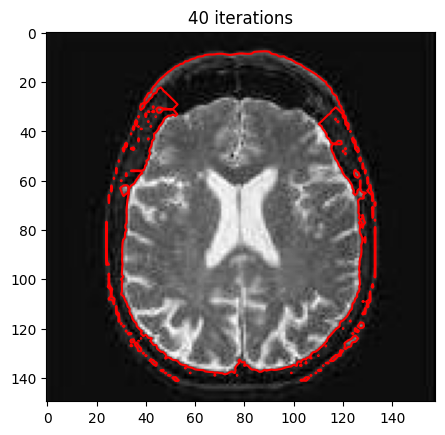

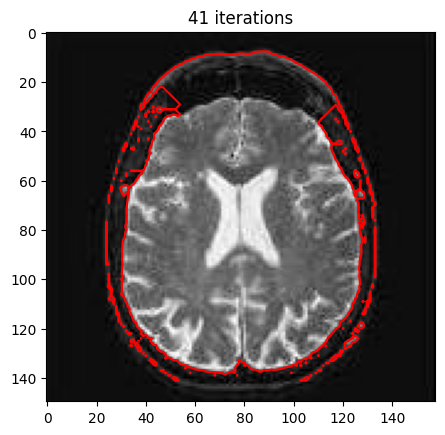

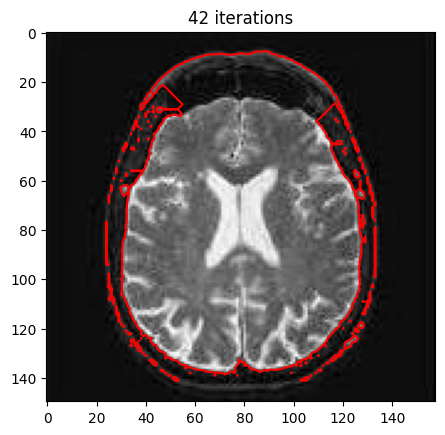

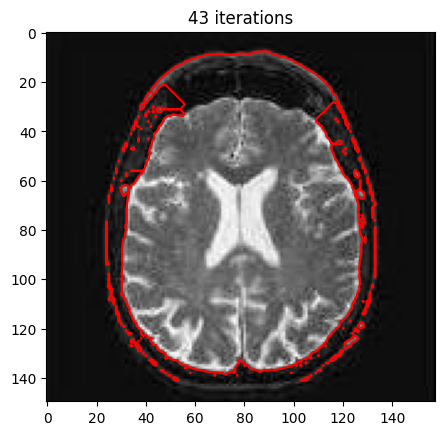

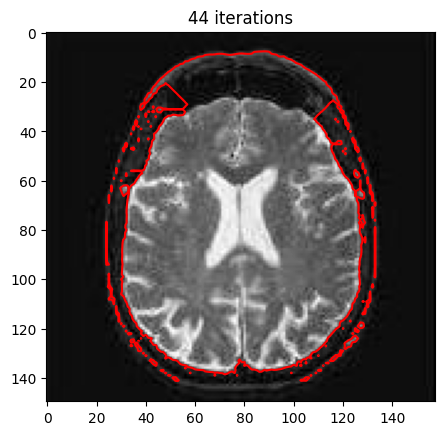

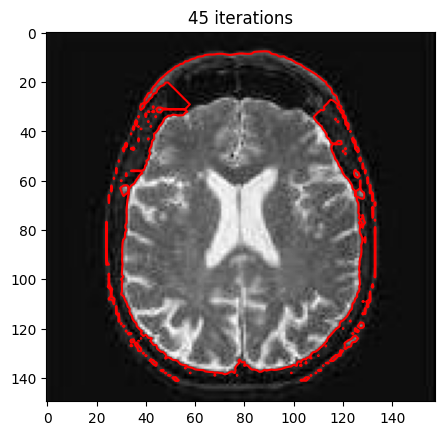

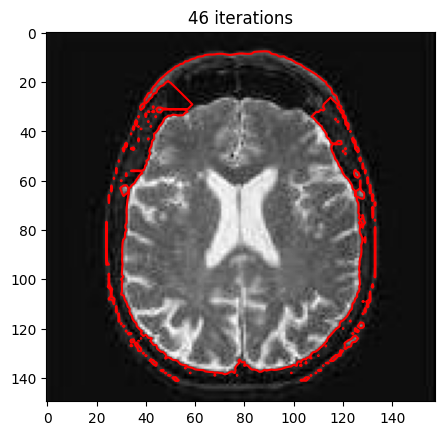

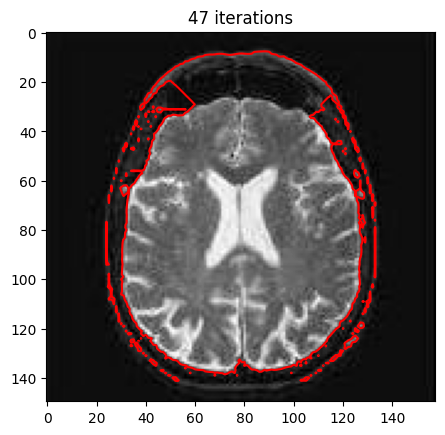

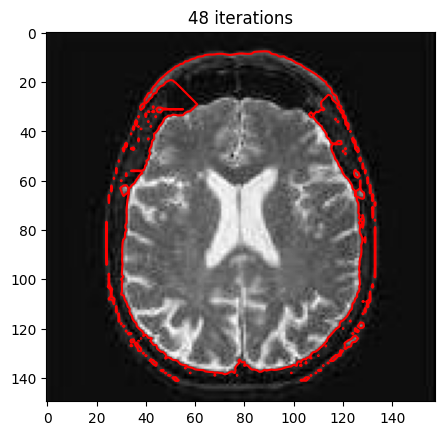

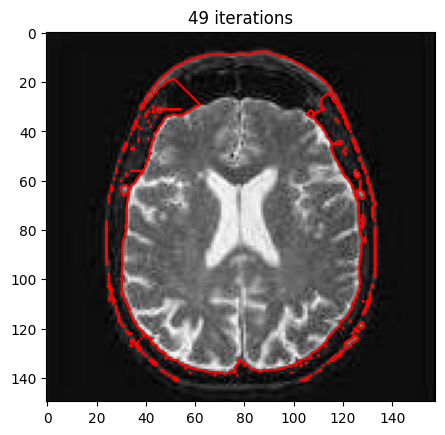

In [14]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import gaussian
import numpy as np

# Read and convert image to grayscale
x = imread('cortex.jpg')
x = rgb2gray(x)

# Convert image to double precision
x = x.astype(np.float64)

# Get image size
row, col = x.shape

# Initialize phi and u with ones and negative ones, respectively
phi = np.ones((row, col))
phi[10:row-10, 10:col-10] = -1
u = -phi

# Show initial contour
plt.figure()
plt.imshow(x, cmap='gray')
c= plt.contour(u, [0], colors='r')
plt.title('Initial Contour')
# Set algorithm parameters
sigma = 1
#G = gaussian(5, sigma)
delt = 1
Iter = 50
mu = 25

# Iterate to evolve contour
plt.figure()
for n in range(Iter):
    # Compute gradient of u
    ux, uy = np.gradient(u)

    # Compute c1 and c2
    c1 = np.sum(x[u < 0]) / np.sum(u < 0)
    c2 = np.sum(x[u >= 0]) / np.sum(u >= 0)

    # Compute spf
    spf = x - (c1 + c2) / 2
    spf = spf / np.max(np.abs(spf))

    # Update u
    u = u + delt * (mu * spf * np.sqrt(ux**2 + uy**2))

    # Plot intermediate contours
    plt.imshow(x, cmap='gray')
    #plt.hold(True)
    c=plt.contour(u, [0], colors='r')
    iternum = f'{n} iterations'
    plt.title(iternum)
    plt.pause(0.02)

    # Threshold u 
    u_gt0=(u >= 0).astype(int)
    u_lt0=(u < 0).astype(int)
    u=u_gt0-u_lt0
    #u = (u >= 0) - (u < 0)



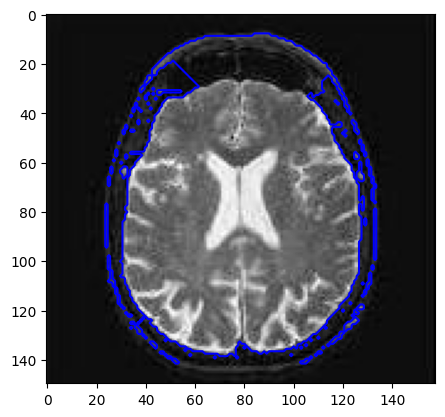

In [15]:
plt.figure()
plt.imshow(x, cmap='gray')
#plt.hold(True)
c=plt.contour(u, [0], colors='b')
plt.show()